In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

 Beer_Dataset2.csv	     XGBoost-Copy1.ipynb
'Data Preprocessing.ipynb'   XGBoost.ipynb
 LASSO-Copy1.ipynb	     beer2-updated.csv
 LASSO.ipynb		     beer2.csv
 LightGBM-Copy1.ipynb	     beer2_ds.csv
 LightGBM.ipynb		     beer_ds.csv
 Presentation		    'updated dataset.ipynb'
'Previous Work'		    'updated_ds_Random Forest.ipynb'
'Random Forest.ipynb'


In [3]:
beer = pd.read_csv("beer2_ds.csv")

In [4]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1206145,1274830,2207415,4359182,177840,269556,1036610,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,All,1,892381,945133,1688109,3208560,135325,478907,539238,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,Blonde,0,967402,1039500,3407085,1738776,449647,727863,923668,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,Blonde,0,984546,1056546,3539493,1735118,225435,150396,4340521,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,Blonde,1,986604,1059673,1855423,3381080,146978,148355,610422,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,926734,991006,1746892,3100788,1033615,1424326,1402140,...,17666,10654,221774,137235,101334,2832827,44758,14757,857,80338
67,592023_STU_QC_006,Stout,1,964519,1022076,1842175,3425686,654969,1449777,1478993,...,7289,26478,354104,114836,85896,1770868,22828,20829,1139,71852
68,592023_WHE_1_027,Wheat,0,823458,872604,1530622,2835754,342958,433742,1331621,...,133123,41372,3170,36145,41646,7085,67,49520,2875,106
69,592023_WHE_2_028,Wheat,0,817188,858183,1485663,2986838,168233,254985,1263554,...,3149,15489,8732,47852,25502,4663319,155583,50530,4166,126671


In [5]:
beer.isnull().sum()

Sample    0
Class     0
QC        0
0         0
1         0
         ..
2681      0
2682      0
2683      0
2684      0
2685      0
Length: 2689, dtype: int64

In [6]:
beer.columns

Index(['Sample', 'Class', 'QC', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684',
       '2685'],
      dtype='object', length=2689)

# Data Exploration and Normalization

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [7]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

# minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


      Feature Index Min Feature Value Max Feature Value
0                 1               All             Wheat
1                 2                 0                 1
2                 3            479734           1315544
3                 4            507948           1759020
4                 5            466169           4088947
...             ...               ...               ...
2683           2684                 0           6472603
2684           2685                 0            241154
2685           2686                 0            407731
2686           2687                 0            444990
2687           2688                 0            246497

[2688 rows x 3 columns]


In [8]:
beer.index

RangeIndex(start=0, stop=71, step=1)

#  Normalizing Feature Values


In [9]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [10]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1.809258,1.194079,0.459027,1.725280,-0.662678,-0.757899,-0.122617,...,0.625009,1.232157,1.053329,0.591885,0.493292,0.359014,-0.023946,0.423856,-0.018859,0.254570
1,5102023_All_QC_040,All,1,0.094267,-0.062359,-0.191927,0.757690,-0.737201,-0.432879,-0.595712,...,0.279311,0.462032,-0.365107,0.033474,0.639567,0.293633,0.449159,0.550038,-0.038908,0.099415
2,5102023_BLD_1_022,Blonde,0,0.504321,0.297263,1.962822,-0.478292,-0.186236,-0.046372,-0.230046,...,0.408196,-0.579153,-0.321381,0.994390,0.573952,-0.601711,-0.572990,0.816360,0.100581,-0.625789
3,5102023_BLD_2_023,Blonde,0,0.598028,0.362223,2.128796,-0.481368,-0.579250,-0.942896,3.020027,...,-0.300538,-0.712125,-0.346407,-1.343762,-1.058524,-0.605327,-0.569609,0.582143,0.037019,-0.628112
4,5102023_BLD_QC_021,Blonde,1,0.609277,0.374140,0.017802,0.902767,-0.716775,-0.946064,-0.528002,...,0.367889,-0.330933,-0.327589,-0.517389,-0.408572,-0.603984,-0.572860,0.594701,-0.076601,-0.627733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,0.282036,0.112458,-0.118242,0.667061,0.837384,1.034895,0.225071,...,-0.195815,-0.606835,1.950021,2.089690,1.753527,1.126097,0.153629,-0.653737,-0.234815,0.691456
67,592023_STU_QC_006,Stout,1,0.488563,0.230862,0.001196,0.940277,0.173667,1.074408,0.298173,...,-0.476908,-0.245422,3.356869,1.490081,1.299892,0.476375,-0.202821,-0.535519,-0.229556,0.551670
68,592023_WHE_1_027,Wheat,0,-0.282456,-0.338759,-0.389338,0.444187,-0.373248,-0.502998,0.157994,...,2.931697,0.094750,-0.374038,-0.616436,-0.000365,-0.602734,-0.572779,0.023078,-0.197178,-0.630171
69,592023_WHE_2_028,Wheat,0,-0.316727,-0.393716,-0.445694,0.571238,-0.679518,-0.780520,0.093250,...,-0.589053,-0.496406,-0.314906,-0.303046,-0.474745,2.246020,1.954979,0.042743,-0.173100,1.454679


In [12]:
# Removing 'Sample' column, it is not needed for this analysis
data_cleaned = beer.drop(['Sample'], axis=1)
missing_values = data_cleaned.isnull().sum().sum()
unique_classes = data_cleaned['Class'].unique()
qc_distribution = data_cleaned['QC'].value_counts(normalize=True)
missing_values, unique_classes, qc_distribution

(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Wheat'],
       dtype=object),
 0    0.676056
 1    0.323944
 Name: QC, dtype: float64)

In [14]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['QC'] == 0].drop('QC', axis=1)

# exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



In [15]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.464375  0.371579  1.993775 -0.453424 -0.194811  0.009035 -0.260646   
 1  0.558462  0.441077  2.152566 -0.456548 -0.907172 -0.996273  2.494653   
 2  0.421442  0.297813  0.072168  1.016695 -1.173317 -1.009562 -0.662752   
 3  0.423242  0.295224  0.055786  0.716370 -0.929587 -0.220180 -0.777497   
 4  0.271388  0.196889  0.030773  1.024401 -0.270755 -0.528471 -0.349617   
 
           7         8         9  ...      2677      2678      2679      2680  \
 0 -0.569478 -0.796027 -0.091483  ... -0.443769 -0.267325  0.956375  0.609127   
 1 -0.597264 -0.811228  1.657820  ... -0.574190 -0.294391 -1.276755 -0.981558   
 2 -0.618983 -0.829505 -0.255488  ... -0.275288 -0.251365 -0.394487 -0.387098   
 3 -0.628998 -0.525684 -0.804922  ... -0.335817 -0.330357 -0.083642 -0.648280   
 4 -0.157984  1.302451 -0.551813  ... -0.385167 -0.323918 -0.418290 -0.255734   
 
        2681      2682      2683      2684      2685  

# L1 Regularization (LASSO)

/home/ayato/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.230e-02, tolerance: 1.253e-02
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.001
Number of selected features: 95
Total Variation Explained: 3.635731187954844


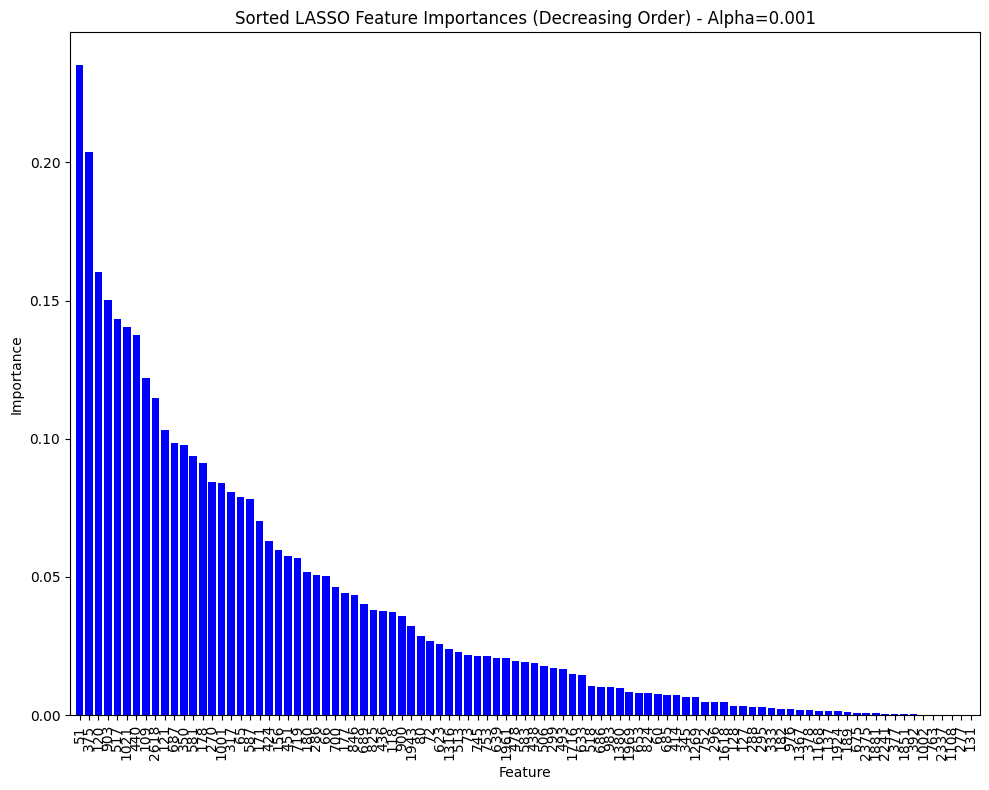

,Feature,Importance
0,51,0.235233
1,375,0.203601
2,120,0.160341
3,903,0.150121
4,517,0.143261
5,1021,0.140503
6,440,0.137595
7,109,0.121895
8,2618,0.114701
9,121,0.103121


Alpha = 0.01
Number of selected features: 45
Total Variation Explained: 3.076186380899966


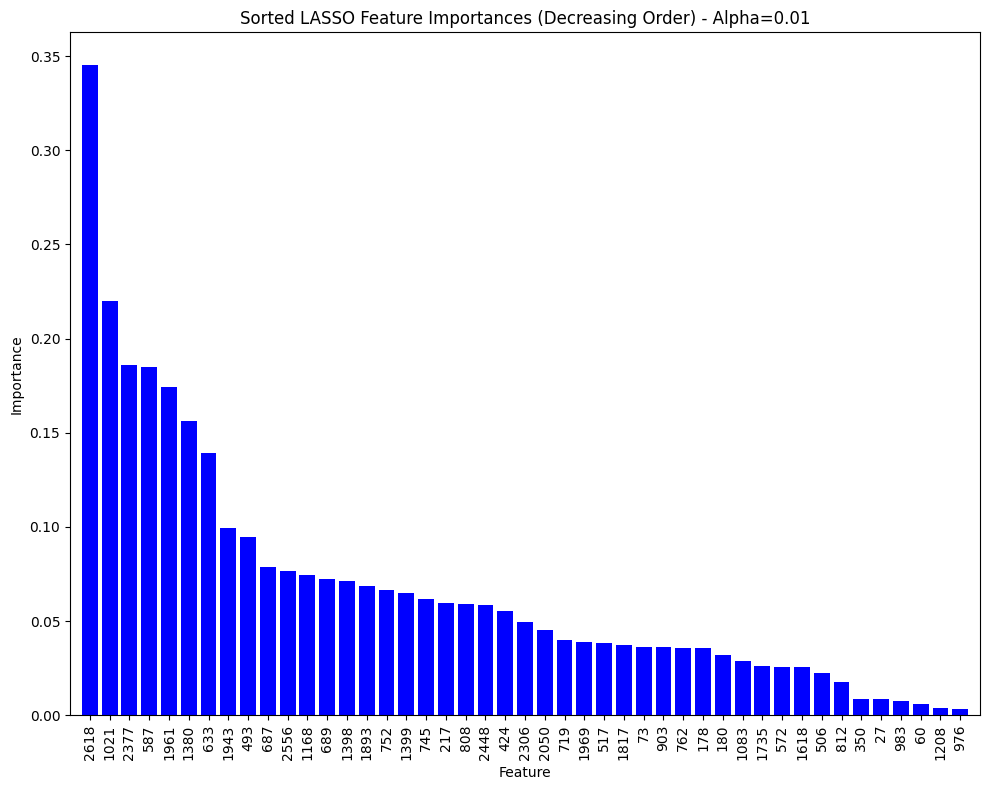

,Feature,Importance
0,2618,0.345362
1,1021,0.219850
2,2377,0.185892
3,587,0.185097
4,1961,0.174063
5,1380,0.156429
6,633,0.139045
7,1943,0.099571
8,493,0.094655
9,687,0.078591


Alpha = 0.1
Number of selected features: 28
Total Variation Explained: 2.350940335788263


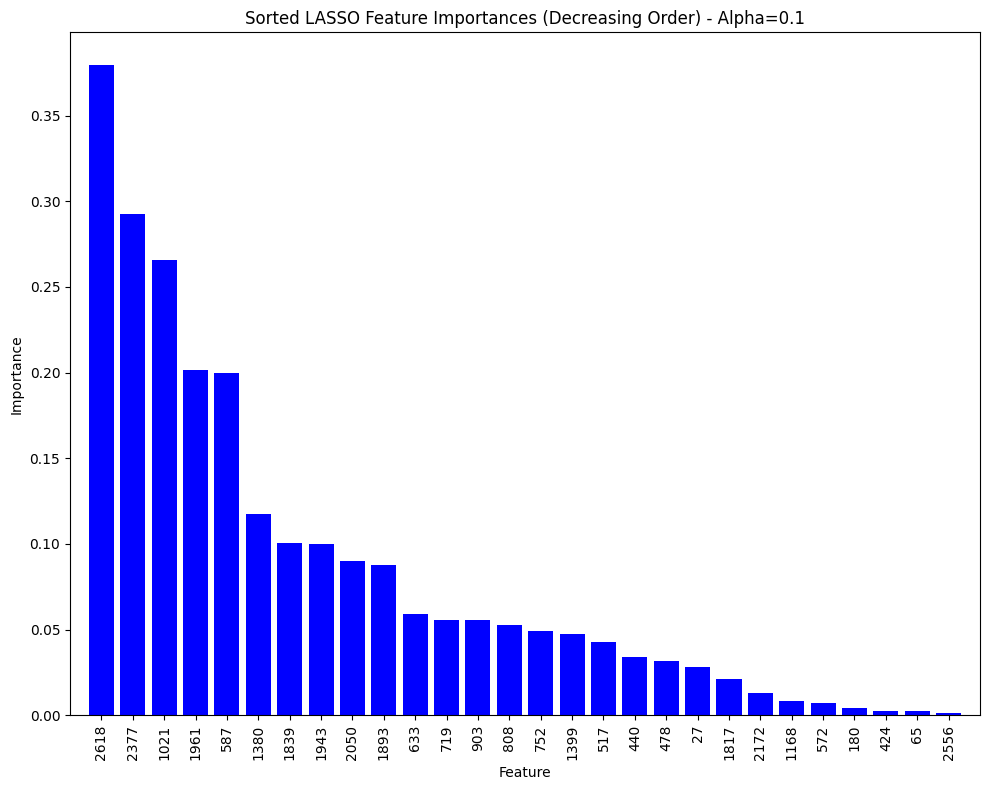

,Feature,Importance
0,2618,0.379691
1,2377,0.292771
2,1021,0.265475
3,1961,0.201706
4,587,0.199520
5,1380,0.117669
6,1839,0.100518
7,1943,0.100039
8,2050,0.090283
9,1893,0.087590


Alpha = 1.0
Number of selected features: 2
Total Variation Explained: 0.2263684094856003


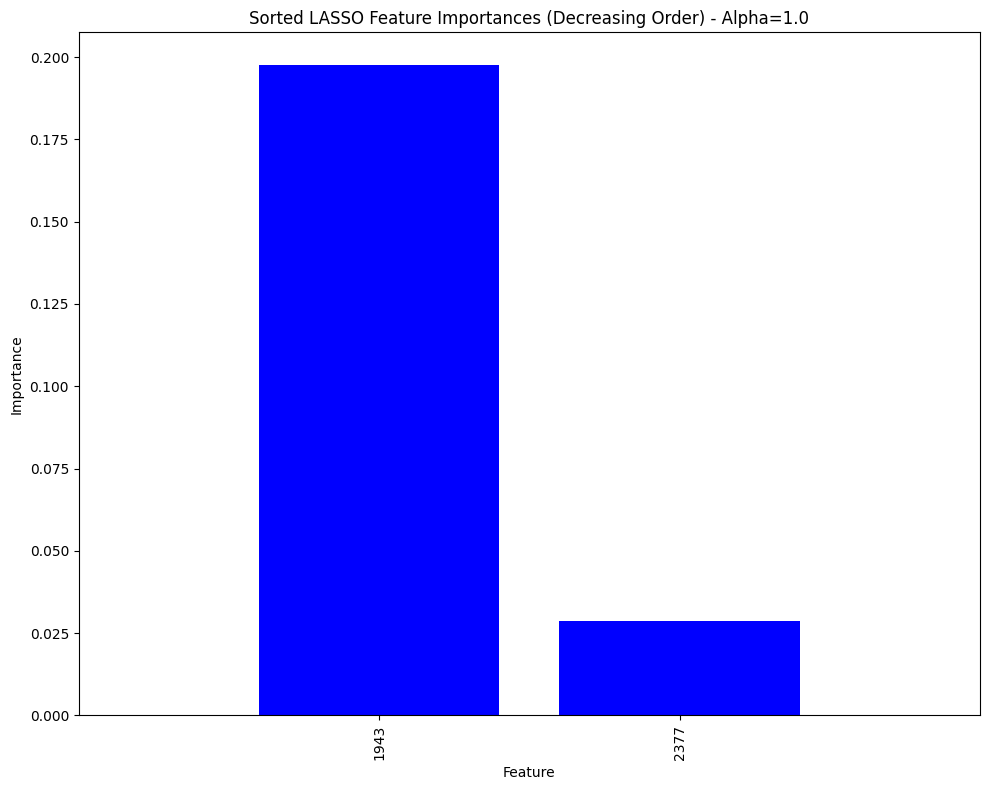

,Feature,Importance
0,1943,0.197639
1,2377,0.028730


Alpha = 10.0
Number of selected features: 0
Total Variation Explained: 0.0


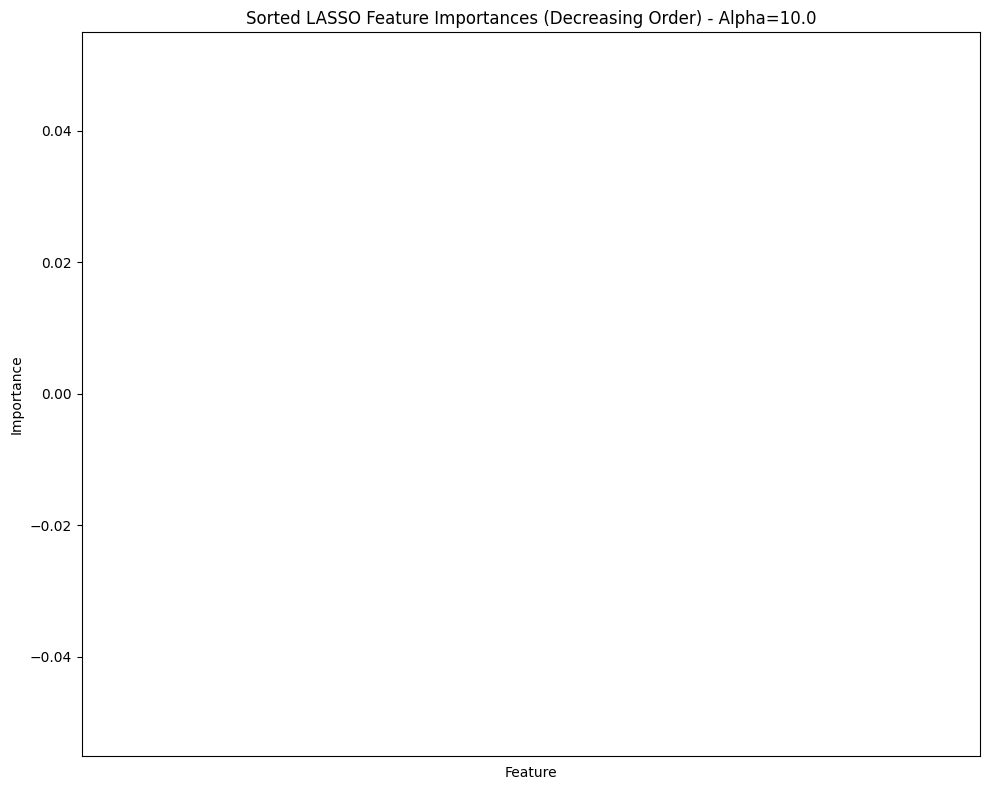

,Feature,Importance


In [16]:
from sklearn.linear_model import Lasso

# Specify the number of features (top 20)
k_features = 20

# Try different values for alpha to find a suitable balance
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

for alpha in alpha_values:
    # Train LASSO regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Get the indices of the selected features
    top_k_indices = np.where(lasso.coef_ != 0)[0]

    # Extract the top k features
    top_k_features_lasso = X.columns[top_k_indices]

    # Assuming you have already obtained the top_k_features_lasso and lasso model
    lasso_coefficients = lasso.coef_
    top_k_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

    # Sort the LASSO features and importances in decreasing order
    sorted_indices_lasso = np.argsort(top_k_importances_lasso)[::-1]
    sorted_features_lasso = top_k_features_lasso[sorted_indices_lasso]
    sorted_importances_lasso = top_k_importances_lasso[sorted_indices_lasso]

    # Print number of selected features and total variation explained
    print(f"Alpha = {alpha}")
    print(f"Number of selected features: {len(top_k_features_lasso)}")
    print(f"Total Variation Explained: {np.sum(top_k_importances_lasso)}")

    # Plot the sorted LASSO feature importances
    plt.figure(figsize=(10, 8))
    plt.title(f'Sorted LASSO Feature Importances (Decreasing Order) - Alpha={alpha}')
    plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
    plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
    plt.xlim([-1, len(top_k_indices)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

    # Display the top k features selected by LASSO in sorted order
    sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
    display(sorted_features_importances_lasso.head(k_features))


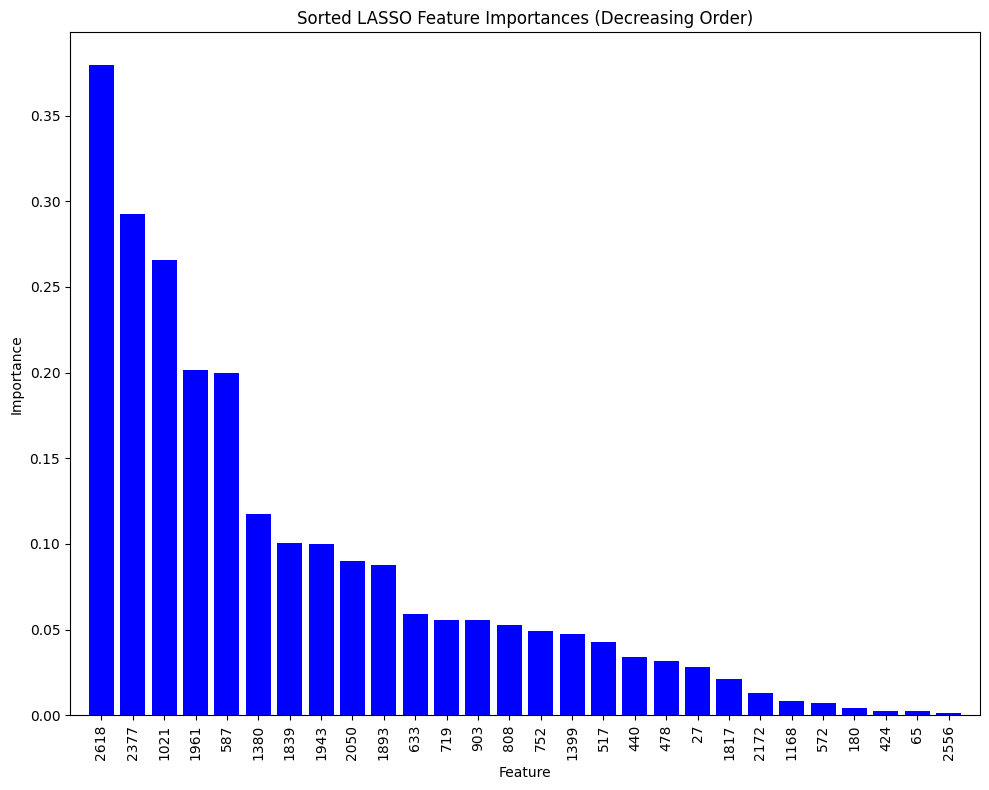

,Feature,Importance
0,2618,0.379691
1,2377,0.292771
2,1021,0.265475
3,1961,0.201706
4,587,0.199520
5,1380,0.117669
6,1839,0.100518
7,1943,0.100039
8,2050,0.090283
9,1893,0.087590


In [17]:
from sklearn.linear_model import Lasso

# Specify the number of features you want (e.g., top 20)
k_features = 20

# Train LASSO regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get the indices of the selected features
top_k_indices = np.where(lasso.coef_ != 0)[0]

# Extract the top 20 features
top_20_features_lasso = X.columns[top_k_indices]
X_top_20_lasso = X[top_20_features_lasso]

# Assuming you have already obtained the top_20_features_lasso and lasso model
lasso_coefficients = lasso.coef_
top_20_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

# Sort the LASSO features and importances in decreasing order
sorted_indices_lasso = np.argsort(top_20_importances_lasso)[::-1]
sorted_features_lasso = top_20_features_lasso[sorted_indices_lasso]
sorted_importances_lasso = top_20_importances_lasso[sorted_indices_lasso]

# Plot the sorted LASSO feature importances
plt.figure(figsize=(10, 8))
plt.title('Sorted LASSO Feature Importances (Decreasing Order)')
plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
plt.xlim([-1, len(top_k_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features selected by LASSO in sorted order
sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
sorted_features_importances_lasso


In [18]:
# Display the selected features
print("Selected Features using LASSO:")
print(top_20_features_lasso)

Selected Features using LASSO:
Index(['27', '65', '180', '424', '440', '478', '517', '572', '587', '633',
       '719', '752', '808', '903', '1021', '1168', '1380', '1399', '1817',
       '1839', '1893', '1943', '1961', '2050', '2172', '2377', '2556', '2618'],
      dtype='object')


In [19]:
# Calculate the cumulative sum of LASSO feature importances for explanation
cumulative_importances_lasso = np.cumsum(sorted_importances_lasso)

# Calculate the total variation explained by the top 20 LASSO features
total_variation_explained_lasso = cumulative_importances_lasso[-1]

# Print the total variation explained by the top 20 LASSO features
print("Total Variation Explained (Top 20 LASSO Features):", total_variation_explained_lasso)


Total Variation Explained (Top 20 LASSO Features): 2.350940335788262


# Feature Visualization with t-SNE and PCA

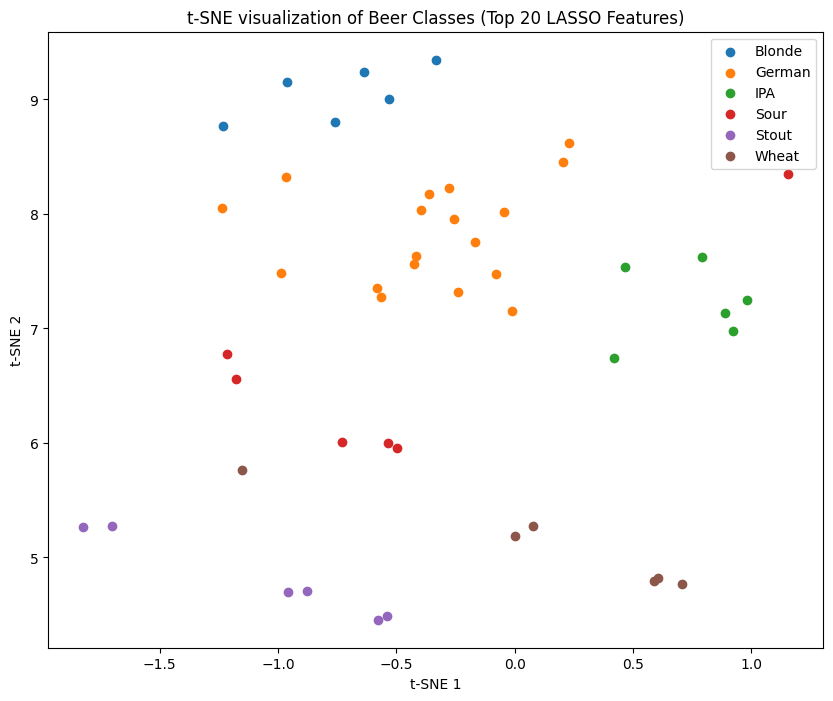

In [20]:
from sklearn.manifold import TSNE

# Check if the number of selected indices is less than the number of features
if len(top_k_indices) > X_scaled.shape[1]:
    raise ValueError("Number of selected indices exceeds the number of features.")

# Selecting only the top 20 features for t-SNE visualization from the LASSO-selected features
X_top_20_lasso = X_scaled[:, top_k_indices]

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne_lasso = tsne.fit_transform(X_top_20_lasso)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_tsne_lasso[y == class_id, 0], X_tsne_lasso[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('t-SNE visualization of Beer Classes (Top 20 LASSO Features)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [21]:
from sklearn.decomposition import PCA

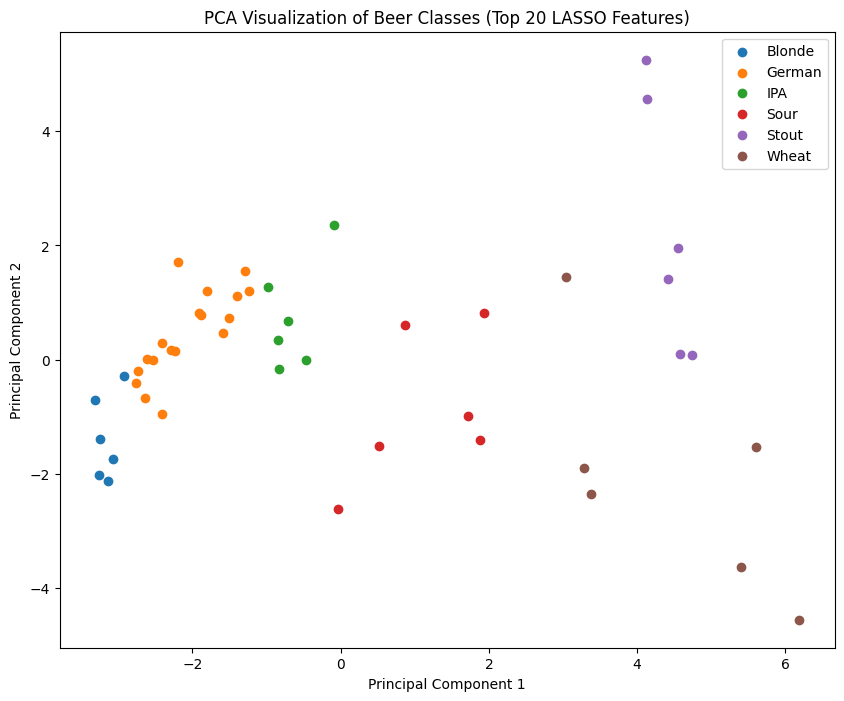

In [22]:
from sklearn.decomposition import PCA

# Check if the number of selected indices is less than the number of features
if len(top_k_indices) > X_scaled.shape[1]:
    raise ValueError("Number of selected indices exceeds the number of features.")

# Selecting only the top 20 features for PCA visualization from the LASSO-selected features
X_pca_top_20_lasso = X_scaled[:, top_k_indices]

# Initialize and fit the PCA model
pca = PCA(n_components=2, random_state=42)
X_pca_top_20_lasso = pca.fit_transform(X_pca_top_20_lasso)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_pca_top_20_lasso[y == class_id, 0], X_pca_top_20_lasso[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('PCA Visualization of Beer Classes (Top 20 LASSO Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/home/ayato/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.230e-02, tolerance: 1.253e-02
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.001
Number of selected features: 95
Total Variation Explained: 3.635731187954844


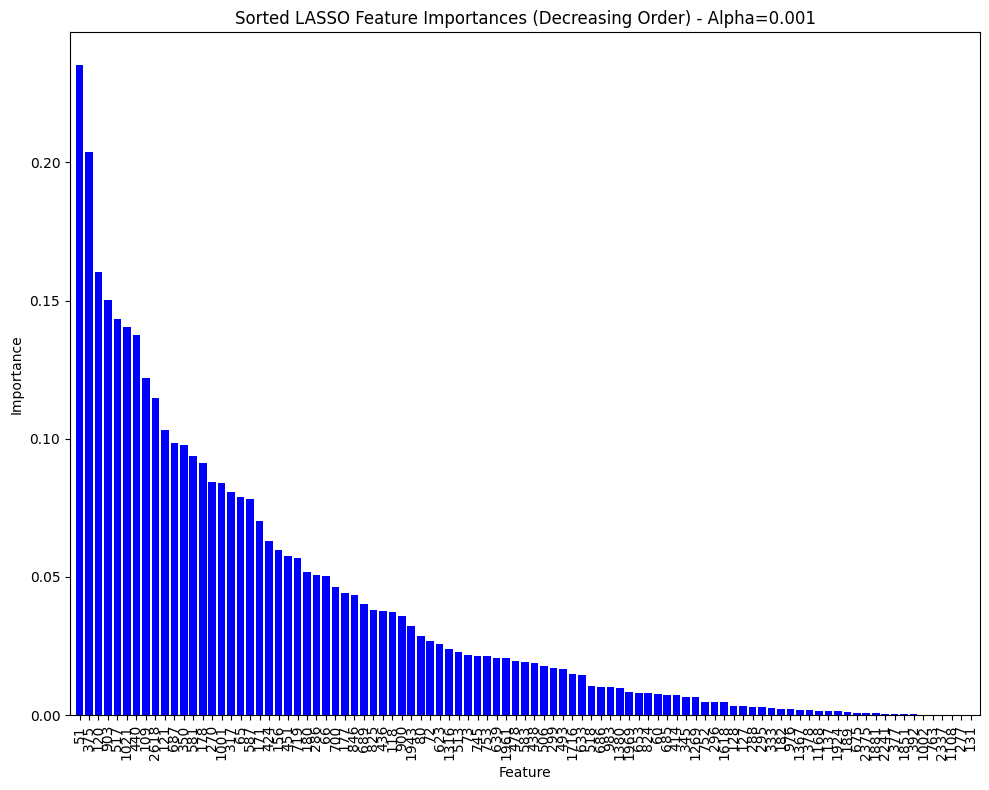

,Feature,Importance
0,51,0.235233
1,375,0.203601
2,120,0.160341
3,903,0.150121
4,517,0.143261
5,1021,0.140503
6,440,0.137595
7,109,0.121895
8,2618,0.114701
9,121,0.103121


Alpha = 0.01
Number of selected features: 45
Total Variation Explained: 3.076186380899966


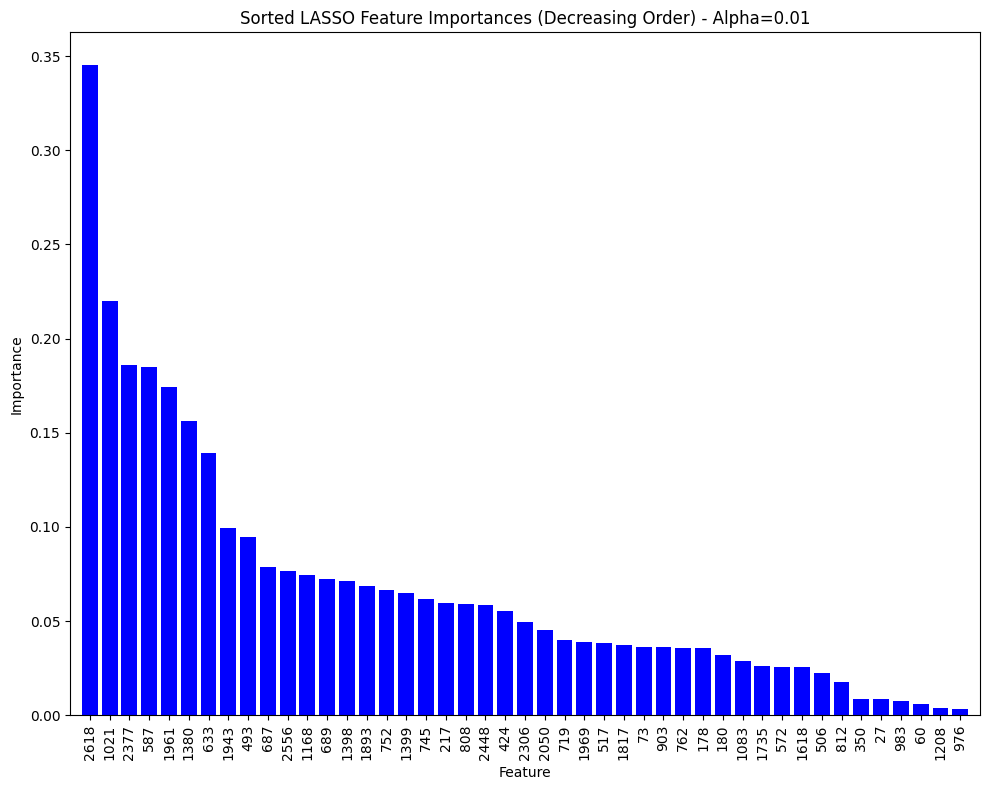

,Feature,Importance
0,2618,0.345362
1,1021,0.219850
2,2377,0.185892
3,587,0.185097
4,1961,0.174063
5,1380,0.156429
6,633,0.139045
7,1943,0.099571
8,493,0.094655
9,687,0.078591


Alpha = 0.1
Number of selected features: 28
Total Variation Explained: 2.350940335788263


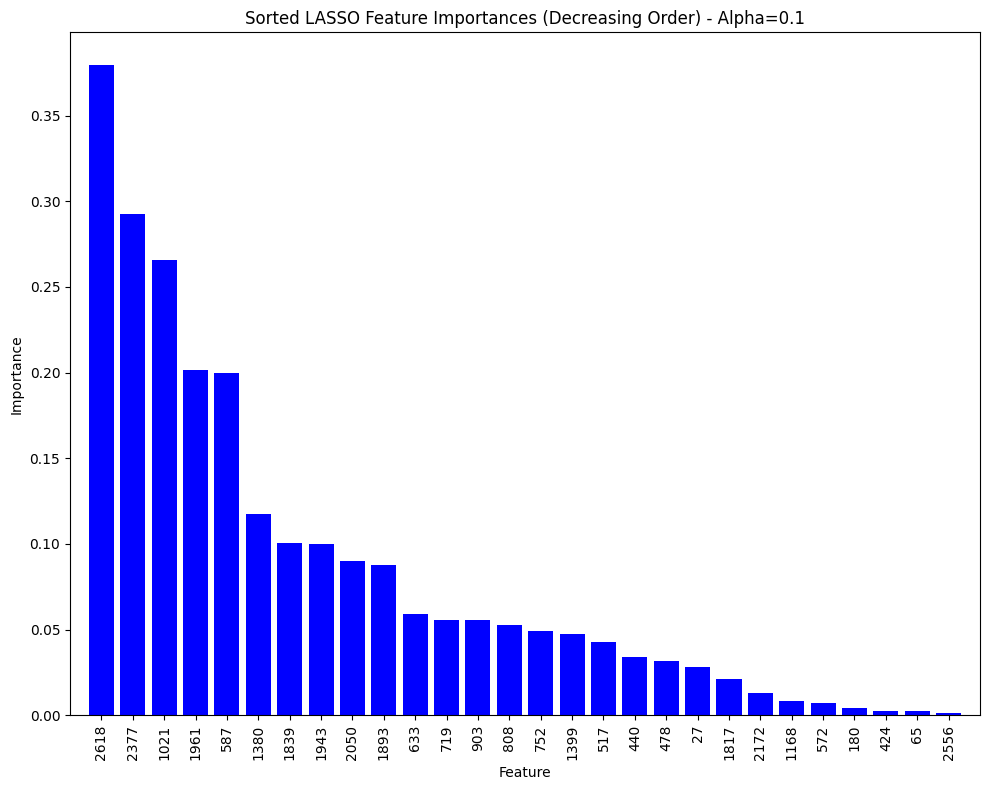

,Feature,Importance
0,2618,0.379691
1,2377,0.292771
2,1021,0.265475
3,1961,0.201706
4,587,0.199520
5,1380,0.117669
6,1839,0.100518
7,1943,0.100039
8,2050,0.090283
9,1893,0.087590


Alpha = 1.0
Number of selected features: 2
Total Variation Explained: 0.2263684094856003


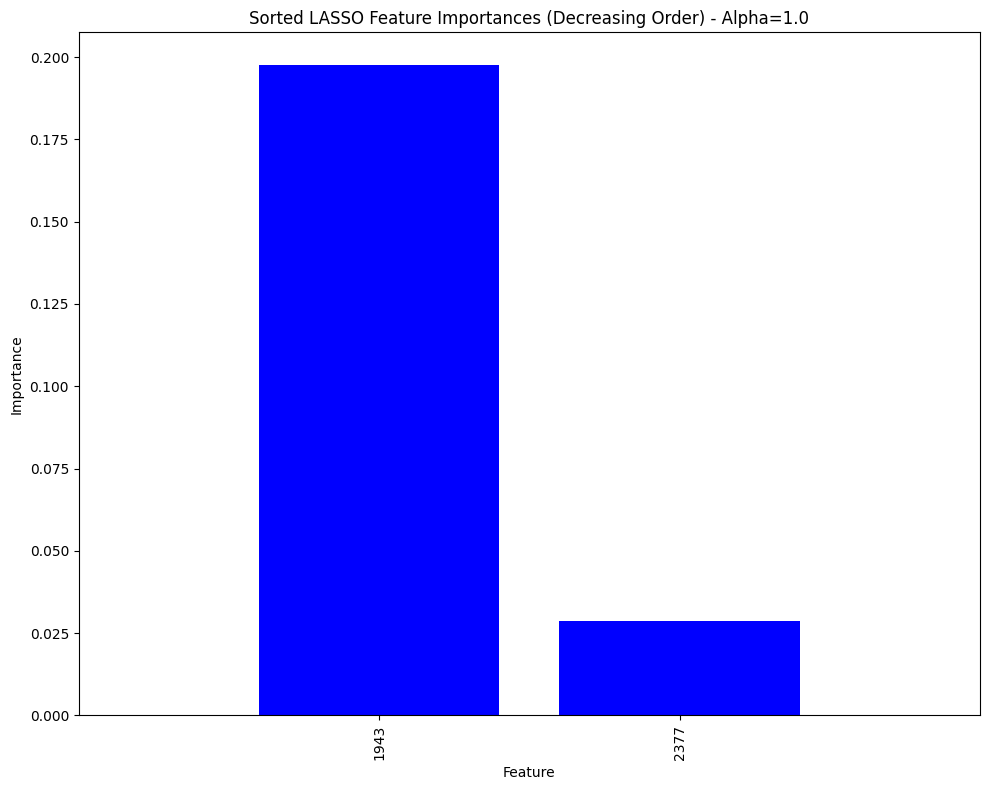

,Feature,Importance
0,1943,0.197639
1,2377,0.028730


Alpha = 10.0
Number of selected features: 0
Total Variation Explained: 0.0


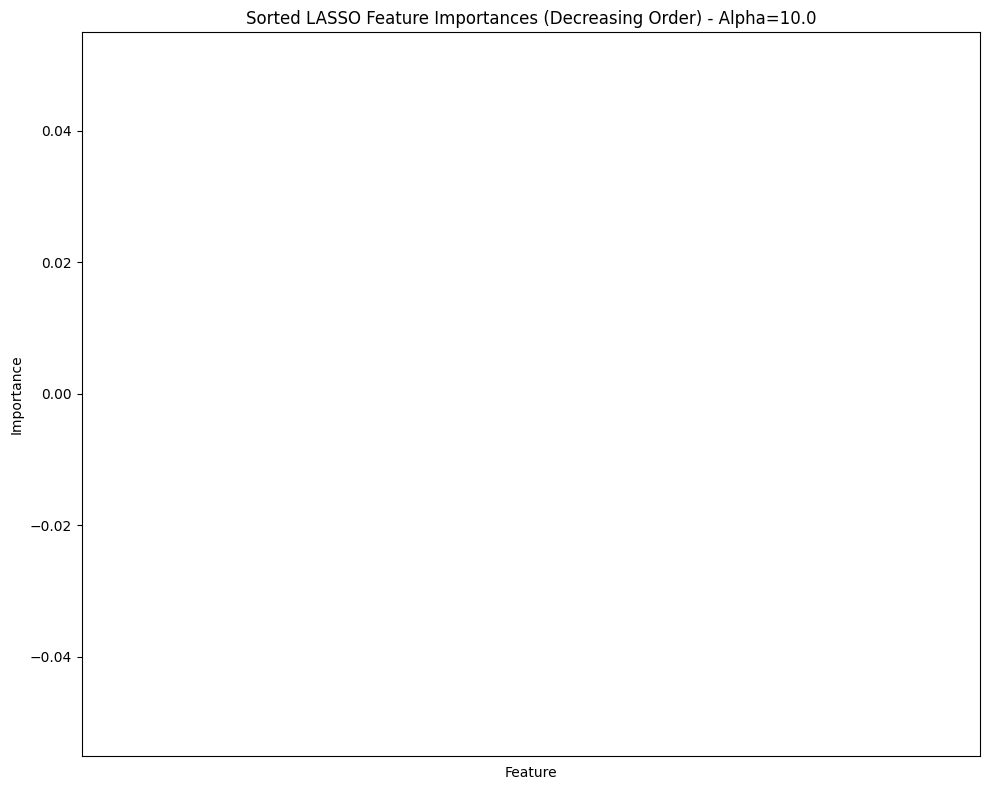

,Feature,Importance


In [23]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the number of features you want (e.g., top 20)
k_features = 20

# Define the alpha values to be tested (regularization parameter)
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Adjust as needed

# Initialize lists to store results
cv_scores_mean = []
cv_scores_std = []

# Iterate over alpha values
for alpha in alpha_values:
    # Train LASSO regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Get the indices of the selected features
    top_k_indices = np.where(lasso.coef_ != 0)[0]

    # Extract the top k features
    top_k_features_lasso = X.columns[top_k_indices]

    # Assuming you have already obtained the top_k_features_lasso and lasso model
    lasso_coefficients = lasso.coef_
    top_k_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

    # Sort the LASSO features and importances in decreasing order
    sorted_indices_lasso = np.argsort(top_k_importances_lasso)[::-1]
    sorted_features_lasso = top_k_features_lasso[sorted_indices_lasso]
    sorted_importances_lasso = top_k_importances_lasso[sorted_indices_lasso]

    # Print number of selected features and total variation explained
    print(f"Alpha = {alpha}")
    print(f"Number of selected features: {len(top_k_features_lasso)}")
    print(f"Total Variation Explained: {np.sum(top_k_importances_lasso)}")

    # Plot the sorted LASSO feature importances
    plt.figure(figsize=(10, 8))
    plt.title(f'Sorted LASSO Feature Importances (Decreasing Order) - Alpha={alpha}')
    plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
    plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
    plt.xlim([-1, len(top_k_indices)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

    # Display the top k features selected by LASSO in sorted order
    sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
    display(sorted_features_importances_lasso.head(k_features))
